<a href="https://colab.research.google.com/github/DragIvBor/Algorithm_2023/blob/master/Knn_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

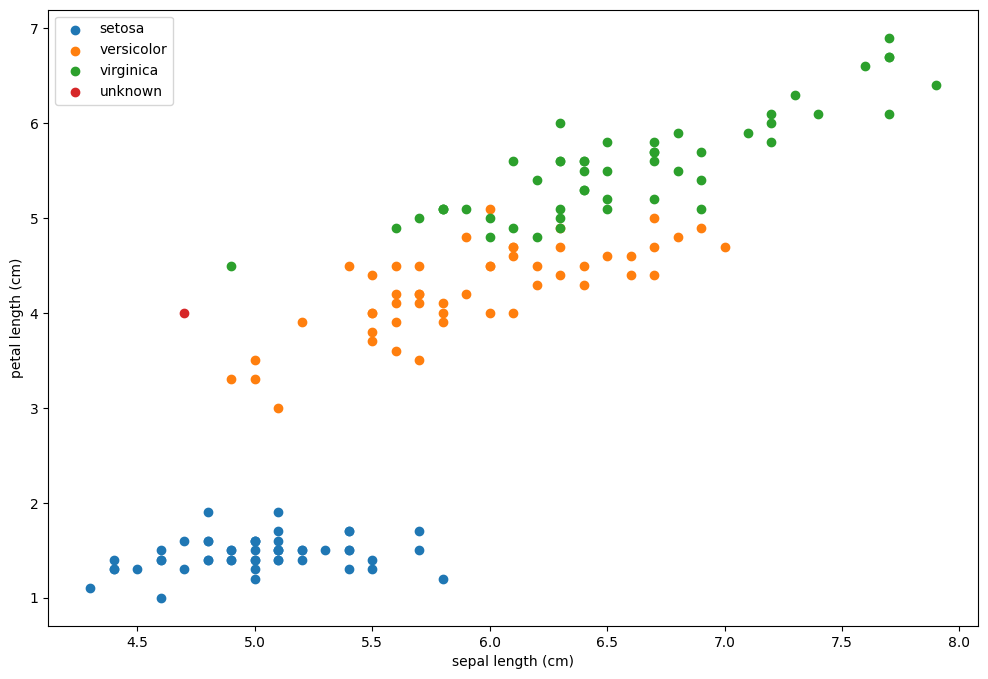

accuracy is: 0.9333333333333333


In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
#%%
data = load_iris()
x_from_np = data.data
y_from_np = data.target

x = torch.tensor(x_from_np)
y = torch.tensor(y_from_np)

shuffled_indices = torch.randperm(y.shape[0])
x = x[shuffled_indices]
y = y[shuffled_indices]

train_size = int(0.8 * y.shape[0])
train_x, test_x = x[:train_size], x[train_size:]
train_y, test_y = y[:train_size], y[train_size:]


#%%
df = pd.DataFrame(x, columns=data["feature_names"])
df.head()
df["target"] = y
df.sample(15)

#%%
plt.figure(figsize=(12, 8))

for i in range(3):
    plt.scatter(
        df.loc[df["target"] == i]["sepal length (cm)"],
        df.loc[df["target"] == i]["petal length (cm)"],
        label=data["target_names"][i]
    )
plt.scatter([4.7], [4], label="unknown")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend()
plt.show()

#%%
class KNN:

  def __init__(self, k):
    self.k = k
    self.features = None
    self.labels = None

  def fit(self, features, labels):
    self.features = features
    self.labels = labels

  def predict(self, x):
    squared_differences = (self.features - x) ** 2
    distances = squared_differences.sum(1)
    nearest_indices = torch.argsort(distances)[:self.k]
    unique_labels, label_counts = torch.unique(self.labels[nearest_indices], return_counts=True)
    most_common_label = torch.argmax(label_counts)
    return unique_labels[most_common_label: most_common_label + 1]

  def test_model(self, features, labels):
    num_samples = features.shape[0]
    correct_predictions = 0
    for i in range(num_samples):
      prediction = self.predict(features[i])
      if prediction == labels[i]:
        correct_predictions += 1
    return correct_predictions / num_samples

#%%
if __name__ == '__main__':
  model = KNN(3)
  model.fit(train_x, train_y)
  acc = model.test_model(test_x, test_y)
  print(f'accuracy is: {acc}')